# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [93]:
# Import the appropriate libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Create two new dataframes
north_df= pd.read_csv("NorthCallCenter.csv")
south_df= pd.read_csv ("SouthCallCenter.csv")

In [3]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [5]:
#Reps in north branch
north_reps = north_df['Rep ID'].unique()
north_reps
len (north_reps)

9

In [6]:
#Reps in south branch 
south_reps = south_df['Rep ID'].unique()
south_reps
len (south_reps)

11

In [7]:

north_df['Busy Minutes'].mean()
#Avg busy minutes north


9.987755102040817

In [8]:
#Avg busy minutes south
south_df['Busy Minutes'].mean()

10.054140127388536

In [9]:
#avg not ready minutes north
north_df ['Not Ready Minutes'].mean()
 

1.9142857142857144

In [10]:
#Avg not ready minutes south 
south_df ['Not Ready Minutes'].mean()

1.910828025477707

In [11]:
#avg incoming wait time north
north_df ['Incoming Wait Time'].mean()

3.048780487804878

In [12]:
#avg incoming wait time south
south_df ['Incoming Wait Time'].mean()

3.0

In [13]:
#avg during call wait time north
north_df ['During Call Wait Time'].mean()

2.9673469387755103

In [14]:
#avg during call wait time south
south_df ['During Call Wait Time'].mean()

 

3.0764331210191083

In [15]:
#time_north = north_df['Time Block']
#time_north

#time_north = north_df.iloc[14:,3]
#time_north

14     12:00 PM
15      1:00 PM
16      3:00 PM
17      2:00 PM
18     10:00 AM
         ...   
240     5:00 PM
241     5:00 PM
242     5:00 PM
243     5:00 PM
244     5:00 PM
Name: Time Block, Length: 231, dtype: object

In [67]:
#Time Block: amount of calls North Center
north_df ['Time Block'].value_counts(ascending=True)





9:00 AM      5
1:00 PM     17
5:00 PM     17
11:00 AM    25
4:00 PM     28
3:00 PM     30
2:00 PM     35
10:00 AM    43
12:00 PM    45
Name: Time Block, dtype: int64

In [68]:
#Time Block: amount of calls South Center
south_df ['Time Block'].value_counts(ascending= True)

9:00 AM      5
1:00 PM     23
4:00 PM     25
5:00 PM     26
2:00 PM     30
11:00 AM    31
3:00 PM     43
10:00 AM    56
12:00 PM    75
Name: Time Block, dtype: int64

In [17]:
#time_south = south_df ['Time Block']
#time_south

#time_south = south_df.iloc[14:,3]
#time_south

14      5:00 PM
15     11:00 AM
16     12:00 PM
17      1:00 PM
18      1:00 PM
         ...   
309     5:00 PM
310     5:00 PM
311     5:00 PM
312     5:00 PM
313     5:00 PM
Name: Time Block, Length: 300, dtype: object

### EDA Results

Make note of your results here!

1. How many reps are in each branch? North: 9, South: 11 
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
North Average busy minutes 9.987755102040817
South Average buy minutes 10.054140127388536

North not ready minutes 1.9142857142857144
South not ready minutes 1.910828025477707

North incoming wait time 3.048780487804878
South incoming wait time 3.0764331210191083

North during call wait time 2.9673469387755103
South during call wait time 3.0764331210191083

3. What is the number of calls taken for each time block?

North: 
9:00 AM      5
10:00 AM    43
11:00 AM    25
12:00 PM    45
1:00 PM     17
2:00 PM     35
3:00 PM     30
4:00 PM     28
5:00 PM     17



Name: Time Block, dtype: int64

South: 
9:00 AM      5
10:00 AM    56
11:00 AM    31
12:00 PM    75
1:00 PM     23
2:00 PM     30
3:00 PM     43
4:00 PM     25
5:00 PM     26





Name: Time Block, dtype: int64


## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
#df.drop.duplicates()
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

#### north_df.info()
south_df.info()

In [19]:
#Trying to answer question 1: Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? for Data Cleaning Section. Want to isolate columns "Incoming or Outgoing [5]\ 
#and "Income Wait Time" [13] to compare "outgoing" and "null" respectively. 
#n_outgoing_calls = north_df.index = [5,13] did not work 
#Df- a collection of one or several series objects
#every column from the df is a series obj itself
null_wait_north = north_df [['Incoming Wait Time', 'Incoming or Outgoing']]
null_wait_north
#now I need to isolate the rows for which there is only null for incoming wait time, and then I'll be
#able to tell if all such values correspond to Outgoing calls... or write code that will tell me how many
#null codes result in incoming calls and deduce from there


,Incoming Wait Time,Incoming or Outgoing
0,1.0,Incoming
1,1.0,Incoming
2,1.0,Incoming
3,1.0,Incoming
4,1.0,Incoming
...,...,...
240,NaN,Outgoing
241,NaN,Outgoing
242,NaN,Outgoing
243,NaN,Outgoing


In [20]:
null_wait_north

,Incoming Wait Time,Incoming or Outgoing
0,1.0,Incoming
1,1.0,Incoming
2,1.0,Incoming
3,1.0,Incoming
4,1.0,Incoming
...,...,...
240,NaN,Outgoing
241,NaN,Outgoing
242,NaN,Outgoing
243,NaN,Outgoing


In [21]:
null_wait_south = south_df [['Incoming Wait Time', 'Incoming or Outgoing']]
null_wait_south

,Incoming Wait Time,Incoming or Outgoing
0,1.0,Incoming
1,1.0,Incoming
2,1.0,Incoming
3,1.0,Incoming
4,1.0,Incoming
...,...,...
309,NaN,Outgoing
310,NaN,Outgoing
311,NaN,Outgoing
312,NaN,Outgoing


In [22]:
# Clean your data here
#numeric columns for north call center
n_numeric_cols= north_df.select_dtypes(include =['number']).columns
print (n_numeric_cols)

Index(['Unnamed: 0', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')


In [23]:
#numeric columns for south call center 
s_numeric_cols = south_df.select_dtypes(include = ['number']).columns
print (s_numeric_cols)

Index(['Unnamed: 0', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')


In [24]:
#North center non-numeric columns
n_non_numeric_cols = north_df.select_dtypes(exclude =['number']).columns
print (n_non_numeric_cols)

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale'],
      dtype='object')


In [25]:
#South center non-numeric columns
s_non_numeric_cols = south_df.select_dtypes(exclude = ['number']).columns
print (s_non_numeric_cols)

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale'],
      dtype='object')


In [26]:
#North center non-numeric columns null values
north_df[n_non_numeric_cols].info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Branch                245 non-null    object
 1   Call Purpose          245 non-null    object
 2   Time Block            245 non-null    object
 3   Incoming or Outgoing  245 non-null    object
 4   Queue                 245 non-null    object
 5   Rep ID                245 non-null    object
 6   Sale                  245 non-null    object
dtypes: object(7)
memory usage: 13.5+ KB


In [27]:
#South center non-numeric columns
south_df[s_non_numeric_cols].info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Branch                314 non-null    object
 1   Call Purpose          314 non-null    object
 2   Time Block            314 non-null    object
 3   Incoming or Outgoing  314 non-null    object
 4   Queue                 314 non-null    object
 5   Rep ID                314 non-null    object
 6   Sale                  314 non-null    object
dtypes: object(7)
memory usage: 17.3+ KB


In [28]:
north_df[n_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Lost Call              245 non-null    int64  
 2   Abandoned              245 non-null    int64  
 3   Busy Minutes           245 non-null    int64  
 4   Not Ready Minutes      245 non-null    int64  
 5   Incoming Wait Time     82 non-null     float64
 6   During Call Wait Time  245 non-null    int64  
 7   Calls                  245 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 15.4 KB


In [29]:
south_df[s_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Lost Call              314 non-null    int64  
 2   Abandoned              314 non-null    int64  
 3   Busy Minutes           314 non-null    int64  
 4   Not Ready Minutes      314 non-null    int64  
 5   Incoming Wait Time     126 non-null    float64
 6   During Call Wait Time  314 non-null    int64  
 7   Calls                  314 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 19.8 KB


In [30]:
num_missing = north_df.isna().sum()
num_missing

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [31]:
num_missing = south_df.isna().sum()
num_missing

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [32]:
#need to use a command to sum the 'outgoing' calls from column "Incoming or Outgoing" to answer the first question below

In [33]:
#North Call Center without Incoming Wait Time, as this column was missing more than 50% of its values  
pct_missing = north_df.isna().mean()

pct_missing[pct_missing < .5]
north_df_less_missing_cols = north_df.loc[:, pct_missing <=.5].copy()
north_df_less_missing_cols

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,2,1


In [34]:
#South Call Center without Incoming Wait Time, as this column was missing more than 50% of its values  
pct_missing = south_df.isna().mean()

pct_missing[pct_missing < .5]
south_df_less_missing_cols = south_df.loc[:, pct_missing <=.5].copy()
south_df_less_missing_cols

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,2,1


In [35]:
#Unneccessary North Center Data, as determined by dropping rows with over 99.9% rows being same value
num_rows = len (north_df)

for col in north_df.columns:
    n_cnts = north_df[col].value_counts(dropna=False)
    n_top_pct = (n_cnts/num_rows).iloc[0]
    
    if n_top_pct > 0.999:
        print ('{0}: {1:.2f}%.format(col, n_top_pct*100)')
        print (n_cnts)
        print()
#Columns "Branch" and "Calls" were dropped as deemed unnnecessary due to having over 99.9% of the same values 
#in each row.

{0}: {1:.2f}%.format(col, n_top_pct*100)
North    245
Name: Branch, dtype: int64

{0}: {1:.2f}%.format(col, n_top_pct*100)
1    245
Name: Calls, dtype: int64



In [36]:
#Unneccessary South Center Data, as determined by dropping rows with over 99.9% rows being same value
num_rows = len (south_df)

for col in south_df.columns:
    s_cnts = south_df[col].value_counts(dropna=False)
    s_top_pct = (s_cnts/num_rows).iloc[0]
    
    if s_top_pct > 0.999:
        print ('{0}: {1:.2f}%.format(col, s_top_pct*100)')
        print (s_cnts)
        print()
 #Columns "Branch" and "Calls" were dropped as deemed unnnecessary due to having over 99.9% of the same values 
#in each row.

{0}: {1:.2f}%.format(col, s_top_pct*100)
South    314
Name: Branch, dtype: int64

{0}: {1:.2f}%.format(col, s_top_pct*100)
1    314
Name: Calls, dtype: int64



In [37]:
north_df.loc[north_df['Incoming or Outgoing']=='Outgoing', :]

#revisit this attempt at data cleaning #1

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
82,82,North,Sales Support,10:00 AM,Outgoing,A,Cam,NO,1,0,8,1,NaN,2,1
83,83,North,Sales Support,10:00 AM,Outgoing,B,Duke,NO,1,0,10,2,NaN,4,1
84,84,North,Sales Support,11:00 AM,Outgoing,B,Xander,NO,1,0,10,1,NaN,4,1
85,85,North,Product Support,9:00 AM,Outgoing,B,Duke,NO,1,0,12,1,NaN,2,1
86,86,North,Sales Support,10:00 AM,Outgoing,B,Lilly,YES,0,1,9,3,NaN,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
Unnecessary data — repetitive data, duplicates, and more
Columns "Branch" and "Calls" in both North Center and South Center df were deemed unnecessary due to having over 99.9% of rows containing same values.
Column "Incoming Wait Time was dropped from South Center and North Center df due to this column missing more than 50% of its values. 

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [38]:
# Manipulate data here
#merge:
callcenter_df = pd.concat ([north_df, south_df], axis=0)
callcenter_df



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [39]:
#Group by Rep ID  & sum & sort by calls. Who has the highest calls? 
gk = callcenter_df.groupby('Rep ID')
df4= gk.sum()
df4


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Alice,3637,0,0,199,46,15.0,58,20
Amanda,2666,0,1,229,43,12.0,60,23
Andy,2494,0,3,228,43,36.0,65,23
Brent,4840,0,1,362,71,17.0,117,37
Cam,2746,1,0,233,46,32.0,66,24
Duke,2999,2,0,292,56,39.0,85,29
Eric,5039,0,0,361,54,47.0,112,35
George,4620,0,0,298,53,41.0,87,29
Helga,5236,0,2,292,58,36.0,95,31


In [40]:
df4.sort_values('Calls', ascending = False)
#rep with the highest calls is Brent

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
Lilly,3375,0,2,307,59,37.0,88,30
Todd,4252,1,0,296,58,21.0,97,29
Duke,2999,2,0,292,56,39.0,85,29
George,4620,0,0,298,53,41.0,87,29


In [41]:
#Average call abandondment in north call center, greater than KPI indicator of 2-5%?
north_df['Abandoned'].mean()
#Apprx 2.86%, within the range of the KPI

0.02857142857142857

In [42]:
#Average call abandonment in south call center, greater than KPI indicator of 2-5%?
south_df['Abandoned'].mean()

 #1.27%

0.012738853503184714

In [43]:
#Average call abandonment in entire company, greater than KPI indicator of 2-5%?

callcenter_df['Abandoned'].mean()

#1.96%, less than the KPI

0.01967799642218247

In [44]:
#Service level = % of calls answered within 2 seconds.
#[Calls with Incoming Wait Time<= 2.0]/[Total Incoming Calls] * 100 

#north_df[('Incoming Wait Time'<= 2)/('Incoming or Outgoing' Incoming = true)]*100

#wait = north_df['Incoming Wait Time']<= 2
#wait.value_counts()


len(north_df.loc[north_df['Incoming Wait Time']<=2, :])/len (north_df.loc[north_df['Incoming or Outgoing']=='Incoming', :])





0.4024390243902439

In [45]:
#north_df.loc[north_df['Incoming or Outgoing']=='Incoming', :]

In [46]:
#40.2% Service level in North call center

In [47]:
#Service level = % of calls answered within 2 seconds.
#[Calls with Incoming Wait Time<= 2.0]/[Total Incoming Calls] * 100 

len(south_df.loc[south_df['Incoming Wait Time']<=2, :])/len (south_df.loc[south_df['Incoming or Outgoing']=='Incoming', :])
#total of 48 calls with less than or equal to 2 second wait time in South Center.

0.38095238095238093

In [48]:
#south_df.loc[south_df['Incoming or Outgoing']=='Incoming', :]

In [49]:
#In south center the service level is 38.1% 

In [50]:
#Service level = % of calls answered within 2 seconds.
#[Calls with Incoming Wait Time<= 2.0]/[Total Incoming Calls] * 100 

#callcenter_df[('Incoming Wait Time'<= 2)/('Incoming or Outgoing', Incoming = true)]

#callcenter_df.loc[callcenter_df['Incoming Wait Time']<=2, :]

In [114]:
callcenter_service = len(callcenter_df.loc[callcenter_df['Incoming Wait Time']<=2, :])/len( callcenter_df.loc[callcenter_df['Incoming or Outgoing']=='Incoming', :])
callcenter_service
#overall, the Company has a 38.94% Service Level for calls answered within 2 seconds. This is an area in need
# of improvement.

0.3894230769230769

In [77]:
#Average speed of answer in each branch & in the entire company? 
#Consider the time it takes to answer all calls. 
#Is that the average of Busy minutes * 60
# + Not ready minutes * 60 + incoming wait time divided by total calls?



#north_total_wait =north_df['Busy Minutes'].sum()*60 + north_df['Not Ready Minutes'].sum()*60 + north_df ['Incoming Wait Time'].sum()

north_answer_speed = north_df['Incoming Wait Time'].mean()
north_answer_speed
#(north_total_wait/north_df ['Calls'].sum())/60

#Average speed of anwswer is 3.049 minutes in North center 


3.048780487804878

In [78]:
south_answer_speed = south_df['Incoming Wait Time'].mean()
south_answer_speed 
#Avg speed of answer is 3.0 minutes in South Center 

3.0

In [79]:
callcenter_df ['Incoming Wait Time'].mean()
#Avg speed of answer is 3.019 minutes in the entire center

3.019230769230769

In [53]:
#WRONG
#Average Wait time in South Center

#south_total_wait =south_df['Busy Minutes'].sum()*60 + south_df['Not Ready Minutes'].sum()*60 + south_df ['Incoming Wait Time'].sum()



#(south_total_wait/south_df ['Calls'].sum())/60

#Average speed of answer is 11.98 minutes in North center 


11.985031847133758

In [54]:
#WRONG
#Average Wait time in entire Call Center Company 


#callcenter_total_wait =callcenter_df['Busy Minutes'].sum()*60 + callcenter_df['Not Ready Minutes'].sum()*60 + callcenter_df ['Incoming Wait Time'].sum()


#(callcenter_total_wait/callcenter_df ['Calls'].sum())/60

#Average speed of answer is 11.96 minutes in North center 

11.956112104949314

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. (done)
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
NORTH CENTER ABANDONMENT: Apprx 2.86%, within the range of the KPI
SOUTH CENTER ABANDONMENT: Apprx 1.27%, less than the KPI, good
COMPANY ABANDONMENT: 1.96%, less than the KPI

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
NORTH CENTER CALLS ANSWERED WITHIN 2 SECS- 40.2% Service level in North call center
SOUTH CENTER CALLS ANSWERED WITHIN 2 SECS- In south center the service level is 38.1% 
COMPANY CALLS ANSWERED WITHIN 2 SECS-  the Company has a 38.94% Service Level for calls answered within 2 seconds. This is an area in need of improvement.


4. For each branch and the entire company, what is the average speed of answer?

Entire company average speed of answer is 3.019 minutes. 
South Branch Avg speed of answer is 3.0 minutes
North Branch Average speed of anwswer is 3.049 minutes 


## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue? (I want to try a bar graph.)
2. What is the service level and average speed of answer per each rep? 

Bar graph due to it being easier to see the differences. 
3. For each type of call purpose, how many calls are outgoing vs. incoming? (Another bar graph, but one that shows incoming bar and outgoing bar side by side)

       Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Queue                                                                      
A           11084          1          4           946                181   
B           18806          4          3          1501                288   
C           21602          4          1          1409                251   
D           27539          7          3          1748                349   

       Incoming Wait Time  During Call Wait Time  Calls  
Queue                                                    
A                   116.0                    272     96  
B                   134.0                    455    149  
C                   160.0                    435    138  
D                   218.0                    531    176  
       Unnamed: 0  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Queue                                                                      
A           11084          1          4    

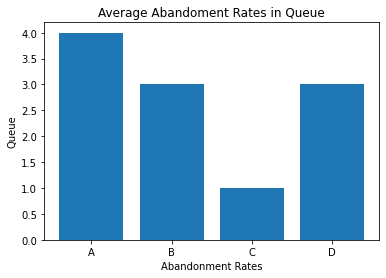

In [55]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
# I want to create a bar graph here.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = callcenter_df.groupby("Queue").agg("sum")

for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    print (queue_dict)

x = ["A", "B", "C", "D"]
y = [4,3,1,3] 
plt.bar (x,y)
plt.xlabel("Abandonment Rates")
plt.ylabel ("Queue")
plt.title ("Average Abandoment Rates in Queue")
plt.show()

#que A & B are in North location & C & D are in South.



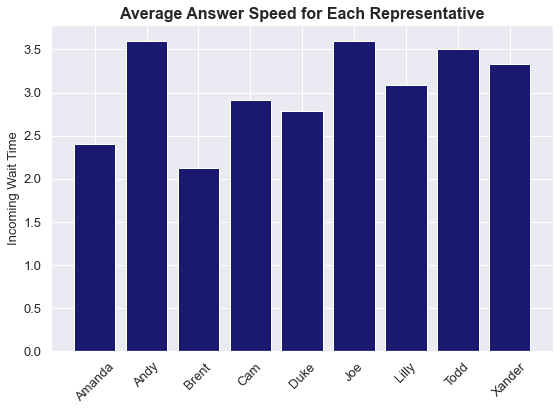

In [113]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]

quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

plt.figure (figsize = (9, 6))
plt.bar(x = north_plt['Rep ID'], 
       height = north_plt ['Incoming Wait Time'], 
       color = "midnightblue")
plt.xticks(rotation = 45, fontsize = 13)
plt.yticks (fontsize = 13)
plt.title ("Average Answer Speed for Each Representative", fontsize = 16, fontweight = "bold")
plt.ylabel ("Incoming Wait Time", fontsize = 13)
plt.show
    
# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  



#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


In [122]:
#line plot
#.plot(north_plt['Rep ID'], north_plt ['Incoming Wait Time'])
#plt.show()

#Histogram
#plt.hist (north_plt['Incoming Wait Time'])

#Scatter Plot 
#plt.scatter(north_plt ['Rep ID'], north_plt['Incoming Wait Time'])

#I do not know why I cannot get the service level to plot 

plt.figure (figsize = (9, 6))
plt.bar(x = service_level ['Rep ID'])

plt.show

KeyError: 'Rep ID'

<Figure size 648x432 with 0 Axes>

In [124]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

callcenter[['Call Purpose','Incoming or Outgoing','Calls']].groupby(["Incoming or Outgoing","Call Purpose"]).count().reset_index()

NameError: name 'purpose_group' is not defined

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
The more efficient call center is the South Center. This is because there are fewer abandoned calls there. 
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

The extra help would benefit the North Center, mainly because their call abandoment is higher. 

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
I wish I had a measure of customer satisifcation for each center. 

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
